In [53]:
#Importing necessary packages

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [54]:
# Importing iris dataset 
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#iris_df['target'] = iris.target_names[iris.target]

# View the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [55]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
# Describe the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Data Visualization  

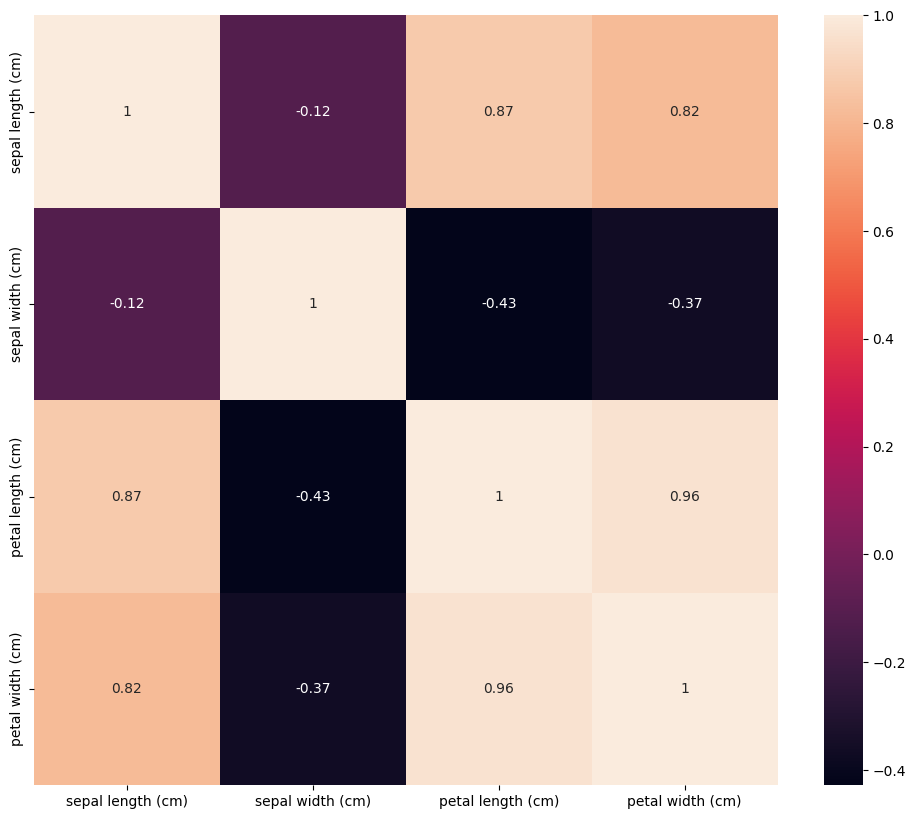

In [57]:
# Correlation matrix 
plt.figure(figsize = (12,10))        # Size of the figure
sns.heatmap(iris_df.corr(),annot = True)
plt.show()

In [58]:
# Split the dataset into features (X) and labels (y)
X = iris_df
y = iris.target_names[iris.target] == 'virginica'

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Unique value of target either virginica is true or false
np.unique(y)

array([False,  True])

In [60]:
# Training the model

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [61]:
# predict the labels for all data points
y_pred = log_reg.predict(X_test)
print("The predicted value of logistic regression : \n",y_pred)
print("The test dataset target values : \n",y_test)

The predicted value of logistic regression : 
 [False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]
The test dataset target values : 
 [False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]


In [62]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]


Since the precision, recall, and accuracy metrics are already equal to 1 in this particular case, the F1 score, which is the harmonic mean of precision and recall, will also be 1. The F1 score is a useful metric when you want to consider both false positives and false negatives equally, but in this scenario, with perfect precision and recall, the F1 score is also perfect.

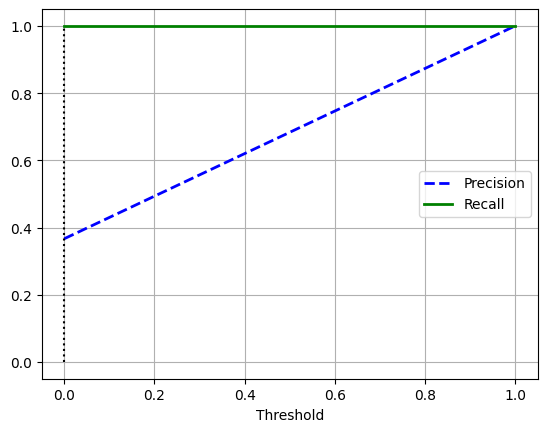

In [63]:

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds[0], 0, 1.0, "k", linestyle="dotted", label="threshold")

plt.grid(True)
plt.xlabel("Threshold")
plt.legend(["Precision", "Recall"], loc="center right")
plt.show()

The Precision-Recall curve provides a visual representation of the trade-off between precision and recall for different classification thresholds. Precision is represented on the y-axis, while recall is shown on the x-axis. Each point on the curve corresponds to a different threshold used to classify instances as positive or negative.

With precision and recall both equal to one in your case, the curve will show a perfect precision-recall trade-off. However, the curve can still be useful for analyzing the model's performance across a range of thresholds. In situations where precision and recall are not both one, the curve helps identify the threshold that offers the best balance between precision and recall.

Keep in mind that with perfect precision and recall, the threshold value becomes less relevant since all instances are classified correctly. Nonetheless, the Precision-Recall curve can still provide insights into the model's behavior as the threshold varies.

In [64]:
# ROC curve


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

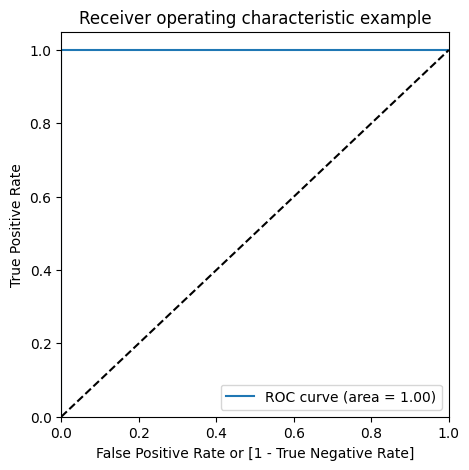

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
draw_roc(y_test, y_pred)

The ROC curve is typically useful when evaluating models that are not already perfect, as it provides insights into their performance across different thresholds. In your case, where the model already has a perfect true positive rate and false positive rate, the ROC curve may not provide much additional information.

However, it's important to note that even in cases where the model's performance is already optimal, the ROC curve can still serve as a visual representation of the model's ability to distinguish between positive and negative instances. The area under the ROC curve (AUC-ROC) can be used as a performance metric, even if it is already equal to 1 in this scenario.

Overall, while the ROC curve may not contribute much inference in your specific case of a perfect model, it remains a valuable tool for evaluating the performance of classifiers in more general scenarios.